In [1]:
import pandas as pd
import numpy as np


In [2]:
STR_COLUMNS = ['ID', 'County', 'Area', 'Year']
VAL_COLUMNS = ['Nom_Tax_Rate_All_Res_Med', 'Nom_Tax_Rate_Res_All_SFH_Med',
               'Eff_Tax_Rate_All_Res_Med', 'Eff_Tax_Rate_Res_All_SFH_Med',
               'AV_Ratio_All_Res_Med']
INPUT2OUTPUT_COL_MAP = {"ID": "GOV ID", "County": "County Name","Area": "City Name"}

CA_city_by_year = pd.read_csv("../../../data/interim/tax_rates_av_ratio_CA_city_by_year.csv",
                             dtype={col: str for col in STR_COLUMNS})

# clean str columns
def clean_str_cols(df, str_columns):
    for col in str_columns:
        df[col] = df[col].str.strip()
        df[col] = df[col].str.lower()
        df[col] = df[col].map(lambda x: None if x == "" else x)

clean_str_cols(CA_city_by_year, STR_COLUMNS)
CA_city_by_year["ID"] = CA_city_by_year["ID"].str.zfill(9)



In [3]:
CA_city_by_year[CA_city_by_year["ID"].isin(["052001009", "052038001"])].sort_values("Year")

,ID,County,Area,Year,Nom_Tax_Rate_All_Res_Med,Nom_Tax_Rate_Res_All_SFH_Med,Eff_Tax_Rate_All_Res_Med,Eff_Tax_Rate_Res_All_SFH_Med,AV_Ratio_All_Res_Med
161,052001009,alameda county,oakland city,1967,NaN,11.53,NaN,1.71,NaN
172,052038001,san francisco county,"san francisco, ca",1967,NaN,10.60,NaN,0.88,NaN
97,052001009,alameda county,oakland city,1972,13.50,13.50,2.60,2.60,21.8
143,052038001,san francisco county,"san francisco, ca",1972,12.70,12.70,2.20,2.20,18.8
39,052001009,alameda county,oakland city,1977,14.45,14.45,2.42,2.38,19.2
76,052038001,san francisco county,"san francisco, ca",1977,11.50,11.50,1.35,1.31,13.7
4,052001009,alameda county,oakland city,1982,1.31,1.31,0.60,0.60,50.6
30,052038001,san francisco county,"san francisco, ca",1982,1.19,1.19,0.57,0.53,47.6


# 1967
14 cities have both "Nom_Tax_Rate_Res_All_SFH_Med" and "Eff_Tax_Rate_Res_All_SFH_Med", while others have no valid indicators.

In [3]:
city_1967 = CA_city_by_year.loc[CA_city_by_year["Year"] == "1967", :].copy()
city_1967 = city_1967.loc[(~city_1967[VAL_COLUMNS].isna()).sum(axis=1) > 0, :].copy()
assert city_1967.shape[0] == 14


# 1972
61 cities have all 5 indicators

In [4]:
city_1972 = CA_city_by_year.loc[CA_city_by_year["Year"] == "1972", :].copy()
city_1972 = city_1972.loc[(~city_1972[VAL_COLUMNS].isna()).sum(axis=1) > 0, :].copy()
assert city_1972.shape[0] == 61

assert (~city_1972[VAL_COLUMNS].isna()).sum(axis=1).unique() == np.array([5])

city_1972.rename(columns=INPUT2OUTPUT_COL_MAP).to_csv(
    "../../../data/interim/tax_rates_av_ratio_CA_city_1972.csv", index=False)

# 1977
58 cities have all 5 indicators

In [5]:
city_1977 = CA_city_by_year.loc[CA_city_by_year["Year"] == "1977", :].copy()
city_1977 = city_1977.loc[(~city_1977[VAL_COLUMNS].isna()).sum(axis=1) > 0, :].copy()
assert city_1977.shape[0] == 58

assert (~city_1977[VAL_COLUMNS].isna()).sum(axis=1).unique() == np.array([5])
city_1977.rename(columns=INPUT2OUTPUT_COL_MAP).to_csv(
    "../../../data/interim/tax_rates_av_ratio_CA_city_1977.csv", index=False)

# 1982
31 cities have all 5 indicators, while 3 more cities have "Nom_Tax_Rate_All_Res_Med","Eff_Tax_Rate_All_Res_Med" and "AV_Ratio_All_Res_Med".


In [6]:
city_1982 = CA_city_by_year.loc[CA_city_by_year["Year"] == "1982", :].copy()
city_1982 = city_1982.loc[(~city_1982[VAL_COLUMNS].isna()).sum(axis=1) > 0, :].copy()
assert city_1982.shape[0] == 34
print((~city_1982[VAL_COLUMNS].isna()).sum(axis=1).value_counts())

city_1982.rename(columns=INPUT2OUTPUT_COL_MAP).to_csv(
    "../../../data/interim/tax_rates_av_ratio_CA_city_1982.csv", index=False)

5    31
3     3
dtype: int64


# Data Viz


## 1972

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline
%matplotlib notebook

In [8]:
REV_STR_COLS = ['ID', 'Year4', 'County', 'Name', 'FYEndDate', 'YearPop']

prop_tax_1972 = pd.read_csv("../../../data/interim/prop_tax_rev_city_1972.csv",
                            dtype={col: str for col in REV_STR_COLS}).drop(["State_Code", "Type_Code"], axis=1)
clean_str_cols(prop_tax_1972, REV_STR_COLS)

prop_tax_1972["ID"] = prop_tax_1972["ID"].str.zfill(9)

prop_tax_1972.head()

,ID,Year4,County,Name,FYEndDate,YearPop,Population,Total_Revenue,Property_Tax
0,052001001,1972,001,alameda city,630,NaN,70968,12543,2937
1,052001002,1972,001,albany city,630,NaN,14674,1922,589
2,052001003,1972,001,berkeley city,630,NaN,116716,25839,9424
3,052001004,1972,001,emeryville city,630,NaN,2681,399,98
4,052001005,1972,001,fremont city,630,NaN,100869,12034,3398


In [9]:
city_1972_with_rev = city_1972.merge(prop_tax_1972.drop("County", axis=1), how="left", on="ID")
city_1972_with_rev.rename(columns = {"Area": "name_in_taxrate", "Name": "name_in_rev"}, inplace=True)
city_1972_with_rev.drop("Year4", axis=1, inplace=True)

In [10]:
assert city_1972_with_rev["Property_Tax"].isna().sum() == 0
assert city_1972_with_rev["Population"].isna().sum() == 0

In [11]:
city_1972_with_rev.head()

,ID,County,name_in_taxrate,Year,Nom_Tax_Rate_All_Res_Med,Nom_Tax_Rate_Res_All_SFH_Med,Eff_Tax_Rate_All_Res_Med,Eff_Tax_Rate_Res_All_SFH_Med,AV_Ratio_All_Res_Med,name_in_rev,FYEndDate,YearPop,Population,Total_Revenue,Property_Tax
0,052001003,alameda county,berkeley city,1972,16.2,16.5,3.4,3.3,21.0,berkeley city,630,NaN,116716,25839,9424
1,052001005,alameda county,fremont city,1972,13.5,13.5,2.5,2.5,21.0,fremont city,630,NaN,100869,12034,3398
2,052001006,alameda county,hayward city,1972,13.7,13.7,2.7,2.7,22.2,hayward city,630,NaN,93058,17122,3426
3,052001009,alameda county,oakland city,1972,13.5,13.5,2.6,2.6,21.8,oakland city,0,NaN,361561,133600,28452
4,052001012,alameda county,san leandro city,1972,10.6,11.5,2.1,2.2,20.9,san leandro city,630,NaN,68698,11757,2364


In [12]:
assert sum(city_1972_with_rev["Population"] == 0) == 0
city_1972_with_rev["prop_tax_rev_per_capita"] = city_1972_with_rev["Property_Tax"] / city_1972_with_rev["Population"]

In [13]:
city_1972_with_rev[["Property_Tax", "prop_tax_rev_per_capita", "Nom_Tax_Rate_All_Res_Med", "Eff_Tax_Rate_All_Res_Med"]].describe()

,Property_Tax,prop_tax_rev_per_capita,Nom_Tax_Rate_All_Res_Med,Eff_Tax_Rate_All_Res_Med
count,61.000000,61.000000,61.000000,61.000000
mean,10540.344262,0.041821,12.545902,2.326230
std,31545.844738,0.032407,1.651421,0.329597
min,0.000000,0.000000,9.200000,1.800000
25%,2010.000000,0.026459,11.300000,2.100000
50%,3189.000000,0.037489,12.300000,2.300000
75%,5336.000000,0.050803,13.500000,2.500000
max,190051.000000,0.228234,18.100000,3.400000


<IPython.core.display.Javascript object>


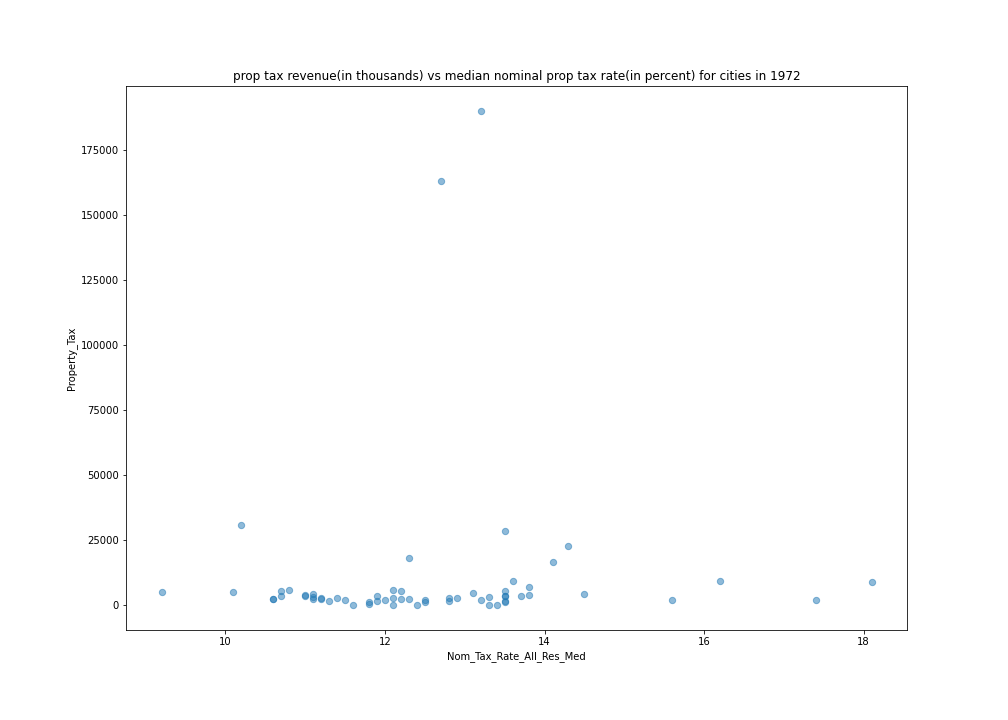

In [14]:

def scatterplot_with_hovering_annaotation(df, x_col_name, y_col_name, anna_arr, title):
    fig,ax = plt.subplots(figsize=(14, 10))
    ax.set_title(title)
    ax.set_xlabel(x_col_name)
    ax.set_ylabel(y_col_name)

    sc = plt.scatter(df[x_col_name], df[y_col_name],s=40, alpha=0.5)

    annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                        bbox=dict(boxstyle="round", fc="w"),
                        arrowprops=dict(arrowstyle="->"))
    annot.set_visible(False)

    def update_annot(ind):

        pos = sc.get_offsets()[ind["ind"][0]]
        annot.xy = pos
        text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                               " ".join([anna_arr[n] for n in ind["ind"]]))
        annot.set_text(text)
        annot.get_bbox_patch().set_alpha(0.4)


    def hover(event):
        vis = annot.get_visible()
        if event.inaxes == ax:
            cont, ind = sc.contains(event)
            if cont:
                update_annot(ind)
                annot.set_visible(True)
                fig.canvas.draw_idle()
            else:
                if vis:
                    annot.set_visible(False)
                    fig.canvas.draw_idle()

    fig.canvas.mpl_connect("motion_notify_event", hover)

    plt.show()

scatterplot_with_hovering_annaotation(city_1972_with_rev, "Nom_Tax_Rate_All_Res_Med", "Property_Tax",
                                      city_1972_with_rev["name_in_taxrate"],
                                     "prop tax revenue(in thousands) vs median nominal prop tax rate(in percent) for cities in 1972")

<IPython.core.display.Javascript object>


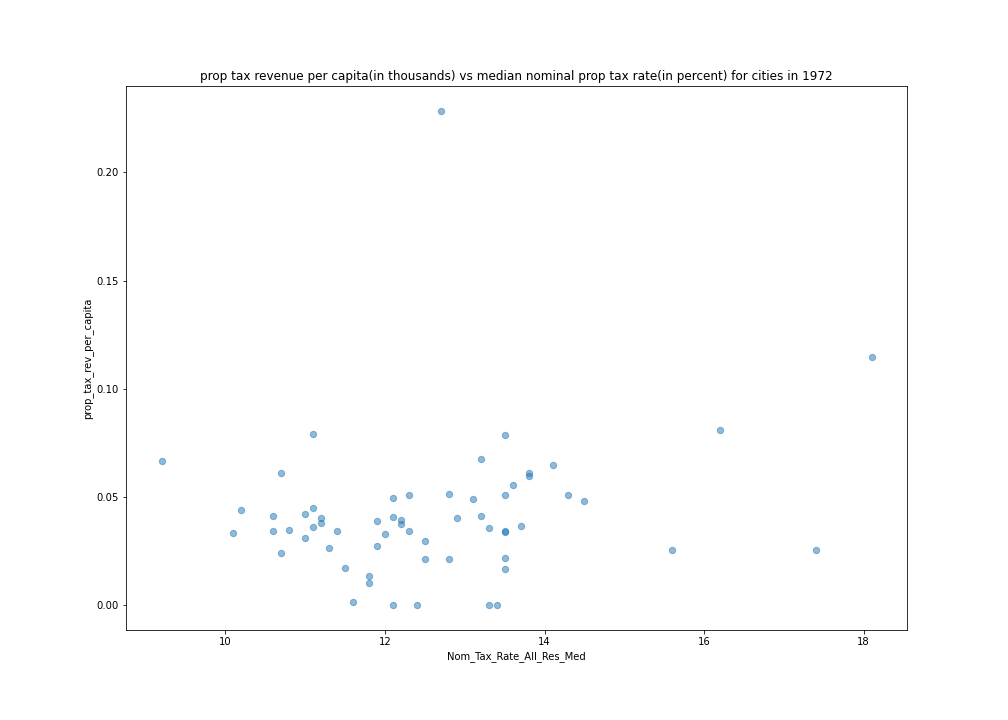

In [15]:
scatterplot_with_hovering_annaotation(city_1972_with_rev, "Nom_Tax_Rate_All_Res_Med", "prop_tax_rev_per_capita",
                                      city_1972_with_rev["name_in_taxrate"],
                                     "prop tax revenue per capita(in thousands) vs median nominal prop tax rate(in percent) for cities in 1972")

In [16]:
city_1972_with_rev.loc[city_1972_with_rev["name_in_taxrate"].str.contains("los angeles city")] # 13.2, 0.06

,ID,County,name_in_taxrate,Year,Nom_Tax_Rate_All_Res_Med,Nom_Tax_Rate_Res_All_SFH_Med,Eff_Tax_Rate_All_Res_Med,Eff_Tax_Rate_Res_All_SFH_Med,AV_Ratio_All_Res_Med,name_in_rev,FYEndDate,YearPop,Population,Total_Revenue,Property_Tax,prop_tax_rev_per_capita
20,052019027,los angeles county,los angeles city,1972,13.2,13.2,2.5,2.5,20.3,los angeles city,0,NaN,2809596,1052664,190051,0.067644


<IPython.core.display.Javascript object>


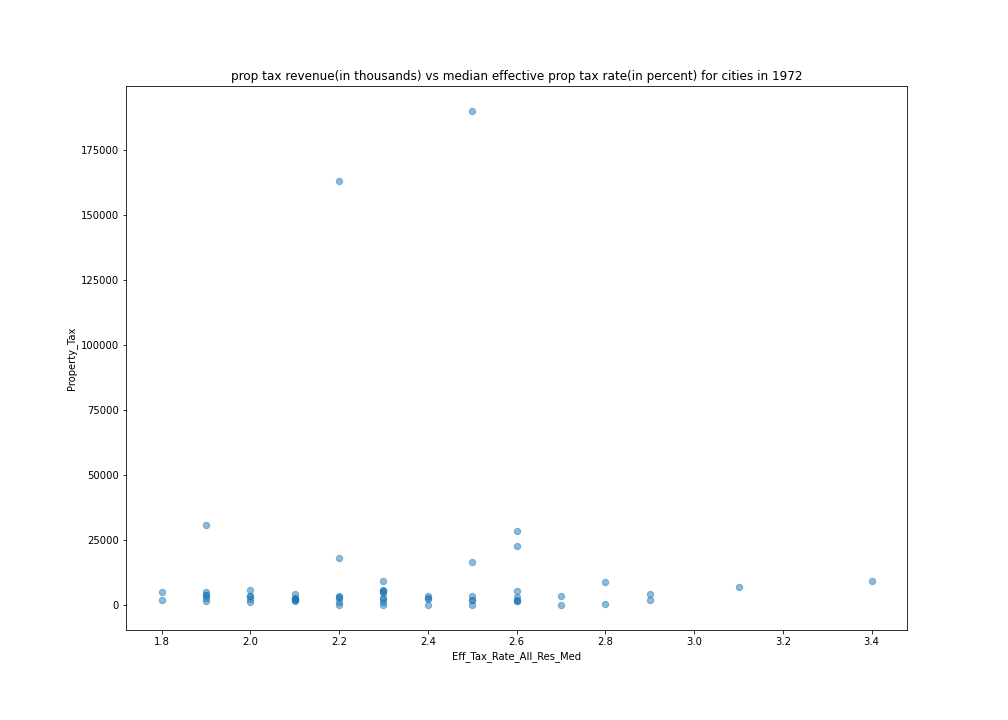

In [17]:
scatterplot_with_hovering_annaotation(city_1972_with_rev, "Eff_Tax_Rate_All_Res_Med", "Property_Tax",
                                      city_1972_with_rev["name_in_taxrate"],
                                     "prop tax revenue(in thousands) vs median effective prop tax rate(in percent) for cities in 1972")

# Eff_Tax_Rate_All_Res_Med is with one decimal point

<IPython.core.display.Javascript object>


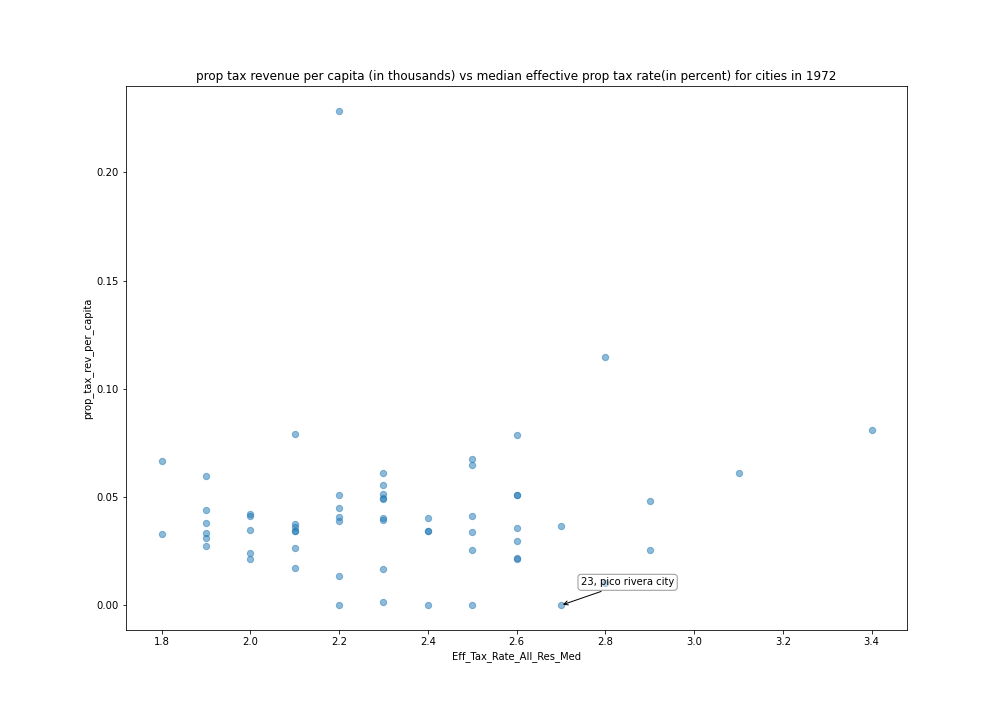

In [18]:
scatterplot_with_hovering_annaotation(city_1972_with_rev, "Eff_Tax_Rate_All_Res_Med", "prop_tax_rev_per_capita",
                                      city_1972_with_rev["name_in_taxrate"],
                                     "prop tax revenue per capita (in thousands) vs median effective prop tax rate(in percent) for cities in 1972")

# 1977

In [19]:
prop_tax_1977 = pd.read_csv("../../../data/interim/prop_tax_rev_city_1977.csv",
                            dtype={col: str for col in REV_STR_COLS}).drop(["State_Code", "Type_Code"], axis=1)
clean_str_cols(prop_tax_1977, REV_STR_COLS)

prop_tax_1977["ID"] = prop_tax_1977["ID"].str.zfill(9)

prop_tax_1977.head()

,ID,Year4,County,Name,FYEndDate,YearPop,Population,Total_Revenue,Property_Tax
0,052001001,1977,001,alameda city,630,NaN,72017,25671,4819
1,052001002,1977,001,albany city,630,NaN,14203,3578,1000
2,052001003,1977,001,berkeley city,1231,NaN,110465,44616,13575
3,052001004,1977,001,emeryville city,630,NaN,4017,3227,943
4,052001005,1977,001,fremont city,630,NaN,117862,22502,5788


In [20]:
city_1977_with_rev = city_1977.merge(prop_tax_1977.drop("County", axis=1), how="left", on="ID")
city_1977_with_rev.rename(columns = {"Area": "name_in_taxrate", "Name": "name_in_rev"}, inplace=True)
city_1977_with_rev.drop("Year4", axis=1, inplace=True)

In [21]:
assert city_1977_with_rev["Property_Tax"].isna().sum() == 0
assert city_1977_with_rev["Population"].isna().sum() == 0

In [22]:
assert sum(city_1977_with_rev["Population"] == 0) == 0
city_1977_with_rev["prop_tax_rev_per_capita"] = city_1977_with_rev["Property_Tax"] / city_1977_with_rev["Population"]

In [23]:
city_1972_with_rev[["Property_Tax", "prop_tax_rev_per_capita", "Nom_Tax_Rate_All_Res_Med", "Eff_Tax_Rate_All_Res_Med"]].describe()

,Property_Tax,prop_tax_rev_per_capita,Nom_Tax_Rate_All_Res_Med,Eff_Tax_Rate_All_Res_Med
count,61.000000,61.000000,61.000000,61.000000
mean,10540.344262,0.041821,12.545902,2.326230
std,31545.844738,0.032407,1.651421,0.329597
min,0.000000,0.000000,9.200000,1.800000
25%,2010.000000,0.026459,11.300000,2.100000
50%,3189.000000,0.037489,12.300000,2.300000
75%,5336.000000,0.050803,13.500000,2.500000
max,190051.000000,0.228234,18.100000,3.400000


<IPython.core.display.Javascript object>


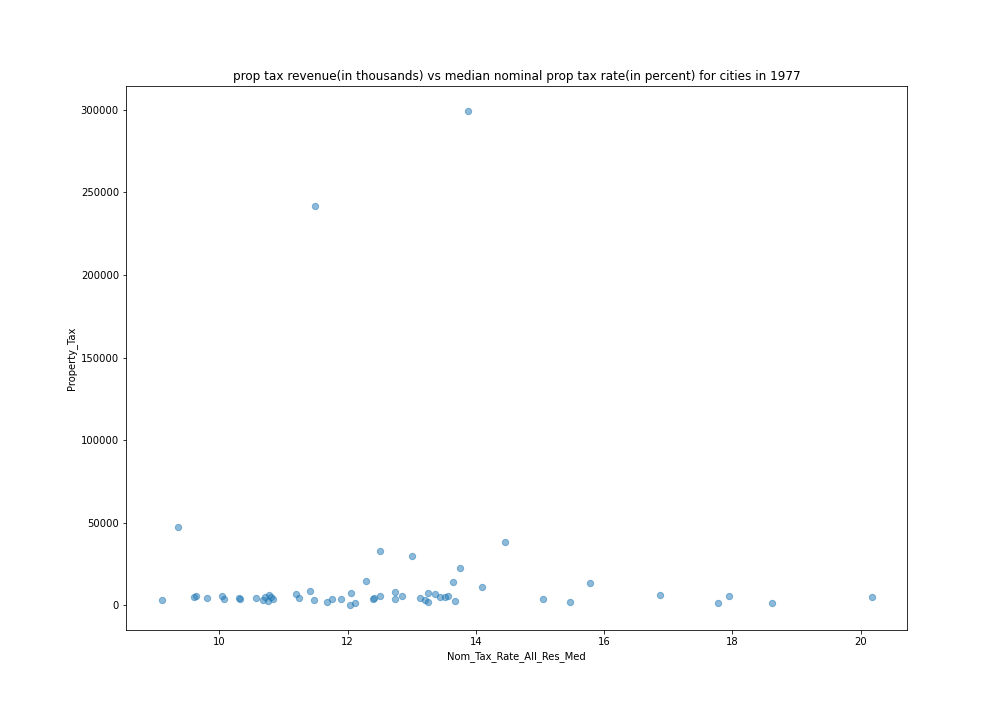

In [24]:
scatterplot_with_hovering_annaotation(city_1977_with_rev, "Nom_Tax_Rate_All_Res_Med", "Property_Tax",
                                      city_1977_with_rev["name_in_taxrate"],
                                     "prop tax revenue(in thousands) vs median nominal prop tax rate(in percent) for cities in 1977")

<IPython.core.display.Javascript object>


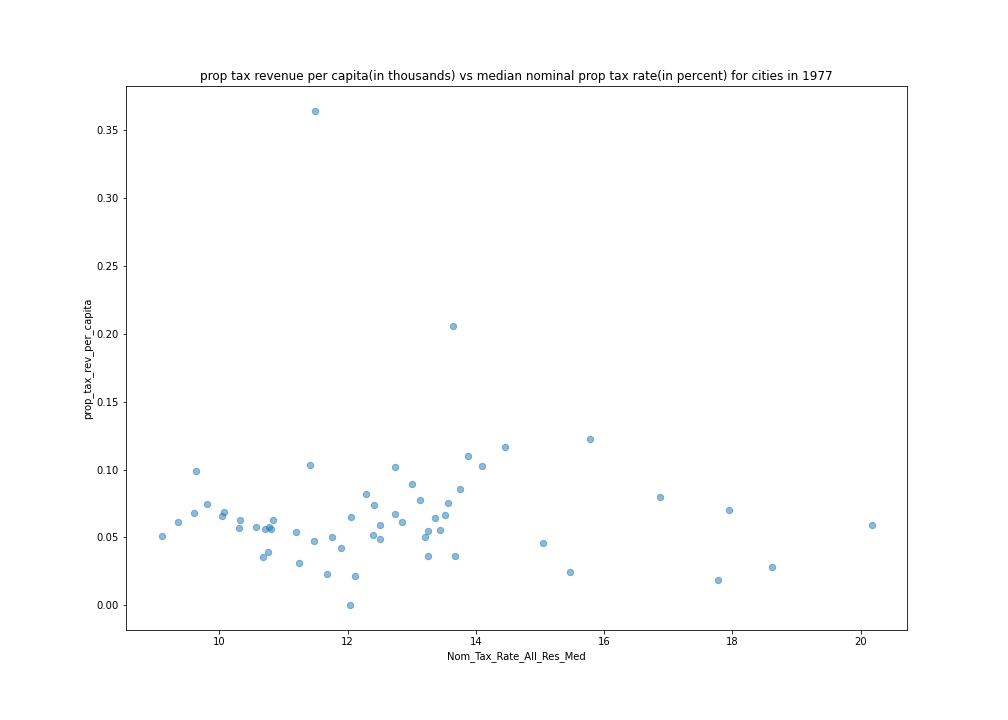

In [25]:
scatterplot_with_hovering_annaotation(city_1977_with_rev, "Nom_Tax_Rate_All_Res_Med", "prop_tax_rev_per_capita",
                                      city_1977_with_rev["name_in_taxrate"],
                                     "prop tax revenue per capita(in thousands) vs median nominal prop tax rate(in percent) for cities in 1977")

<IPython.core.display.Javascript object>


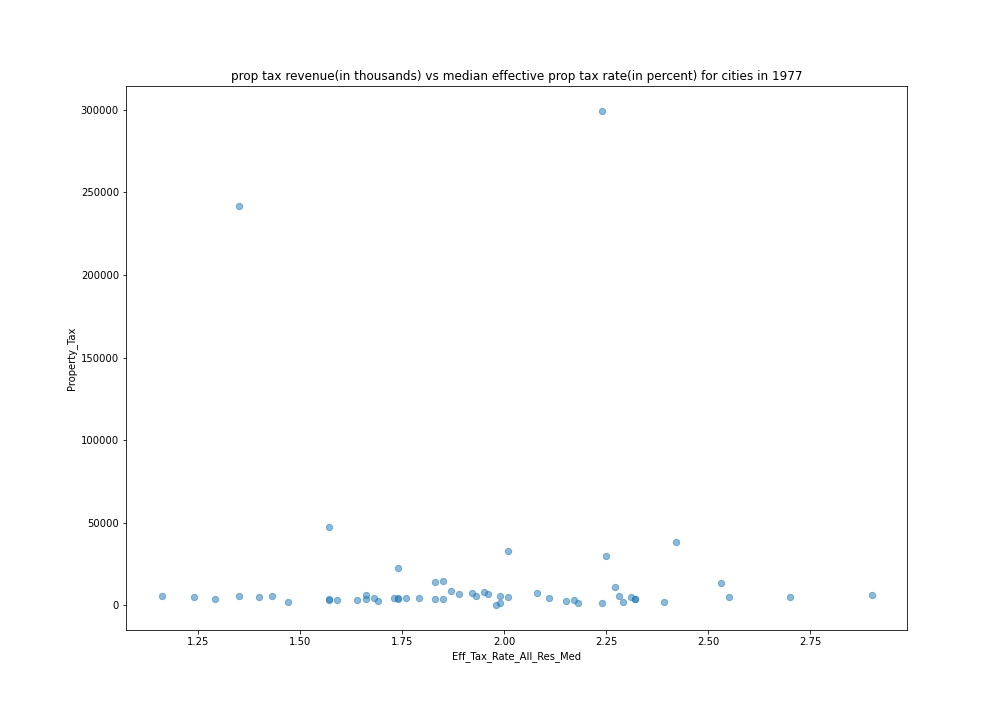

In [26]:
scatterplot_with_hovering_annaotation(city_1977_with_rev, "Eff_Tax_Rate_All_Res_Med", "Property_Tax",
                                      city_1977_with_rev["name_in_taxrate"],
                                     "prop tax revenue(in thousands) vs median effective prop tax rate(in percent) for cities in 1977")

<IPython.core.display.Javascript object>


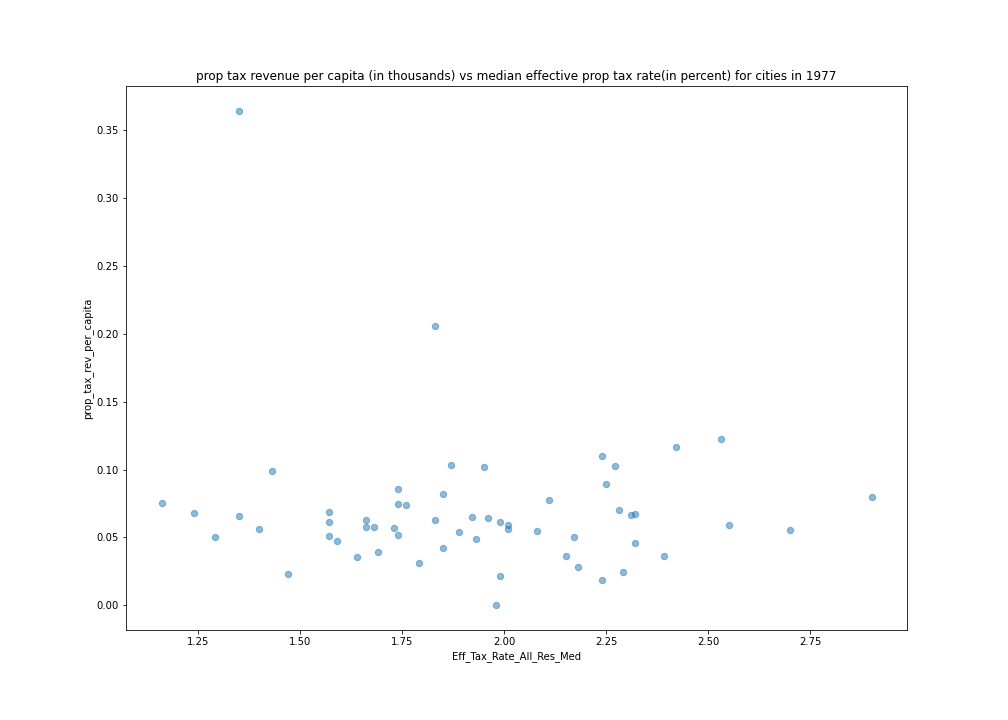

In [27]:
scatterplot_with_hovering_annaotation(city_1977_with_rev, "Eff_Tax_Rate_All_Res_Med", "prop_tax_rev_per_capita",
                                      city_1977_with_rev["name_in_taxrate"],
                                     "prop tax revenue per capita (in thousands) vs median effective prop tax rate(in percent) for cities in 1977")